In [91]:
import numpy as np
import time, os, sys
import mxnet as mx
import matplotlib.pyplot as plt
import skimage
import glob
import sys
import pandas as pd
import cv2
import skimage.io
import time, os, sys
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
from cellpose import utils

In [64]:
Colors_map = {
        0: [236, 240, 241],
        1: (46, 204, 113),
        2: (52, 152, 219),
        3: (155, 89, 182),
        4: [149, 165, 166],
        5: [127, 140, 141]
    }
Colors_vals= {
        0: [231, 76, 60],
        1: [46, 204, 113],
        2: [52, 152, 219],
        3: [155, 89, 182],
        4: [241, 196, 15],
        5: [127, 140, 141]
    }
def getColor(name):
    for key, color in Colors_vals.items():
        if name == key:
            return color
    print('%s not found, return default (231, 76, 60)'%name)
    return [231, 76, 60]

def save(all_mask,all_tiff):
    for i in range(len(all_tiff)):
        name = os.path.basename(all_tiff[0]).replace('.tif','.jpg')
        cv2.imwrite('data/masks/%s'%name, all_mask[i])

def getAnnotation(annotations, name):
    for file,val in zip(annotations[0],annotations[1]):
        if name in file:
            return val
    return -1

def show(img,title):
    fig2 = plt.figure(figsize = (15,15))
    ax3 = fig2.add_subplot(111)
    ax3.imshow(img, interpolation='none')
    ax3.set_title(title)

def getPoint(data,i):
    return int(data['x'][i]),int(data['y'][i])

def activate(array,value):
    return (array == value) * 1

def activateImage(image,mask):
    return (mask == 1)*image



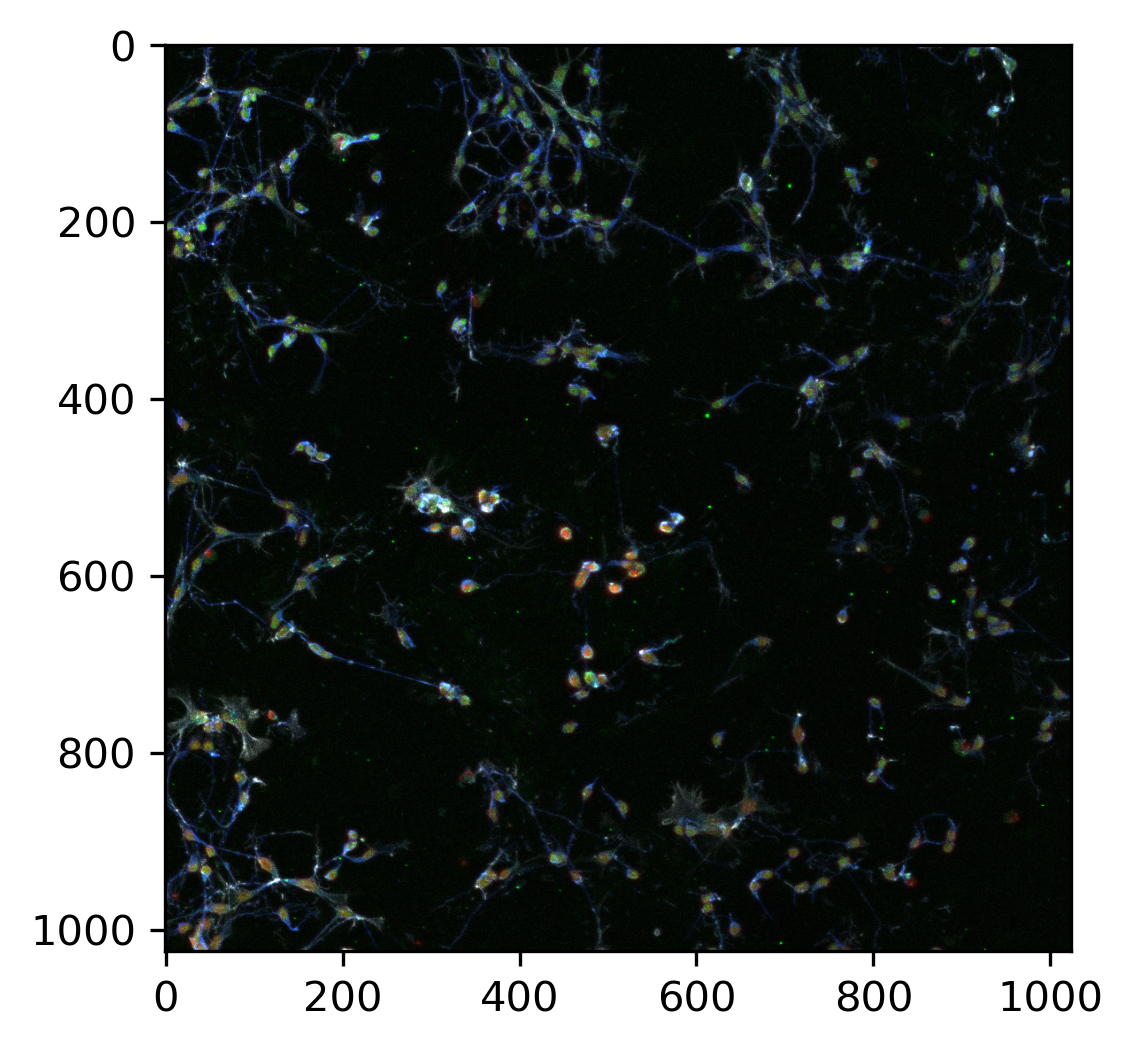

In [147]:
IMG_PATH = '../data/raw/RAW_TIFF/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_26_ch_4.tif'
img = plt.imread(IMG_PATH)
plt.imshow(img)
plt.savefig('input.png')

In [95]:
from cellpose import models

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type='cyto')

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# or if you have different types of channels in each image
channels = [[3,1], [3,1], [3,2]]

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended) 
# diameter can be a list or a single number for all images
masks, flows, styles, diams = model.eval([img,img,img], diameter=None, channels=channels)

>>>> using CPU


Downloading: "http://www.cellpose.org/models/cyto_0" to /home/mzouink/.cellpose/models/cyto_0
100%|██████████| 25.2M/25.2M [00:02<00:00, 9.09MB/s]
Downloading: "http://www.cellpose.org/models/cyto_1" to /home/mzouink/.cellpose/models/cyto_1
100%|██████████| 25.2M/25.2M [00:02<00:00, 9.33MB/s]
Downloading: "http://www.cellpose.org/models/cyto_2" to /home/mzouink/.cellpose/models/cyto_2
100%|██████████| 25.2M/25.2M [00:03<00:00, 8.28MB/s]
Downloading: "http://www.cellpose.org/models/cyto_3" to /home/mzouink/.cellpose/models/cyto_3
100%|██████████| 25.2M/25.2M [00:02<00:00, 10.2MB/s]
Downloading: "http://www.cellpose.org/models/size_cyto_0.npy" to /home/mzouink/.cellpose/models/size_cyto_0.npy
100%|██████████| 3.55k/3.55k [00:00<00:00, 347kB/s]
Downloading: "http://www.cellpose.org/models/nuclei_0" to /home/mzouink/.cellpose/models/nuclei_0
100%|██████████| 25.2M/25.2M [00:03<00:00, 8.17MB/s]
Downloading: "http://www.cellpose.org/models/nuclei_1" to /home/mzouink/.cellpose/models/nuclei_1

processing 3 images


  0%|          | 0/3 [00:00<?, ?it/s]

estimated cell diameters for all images


100%|██████████| 3/3 [03:01<00:00, 60.57s/it]


3

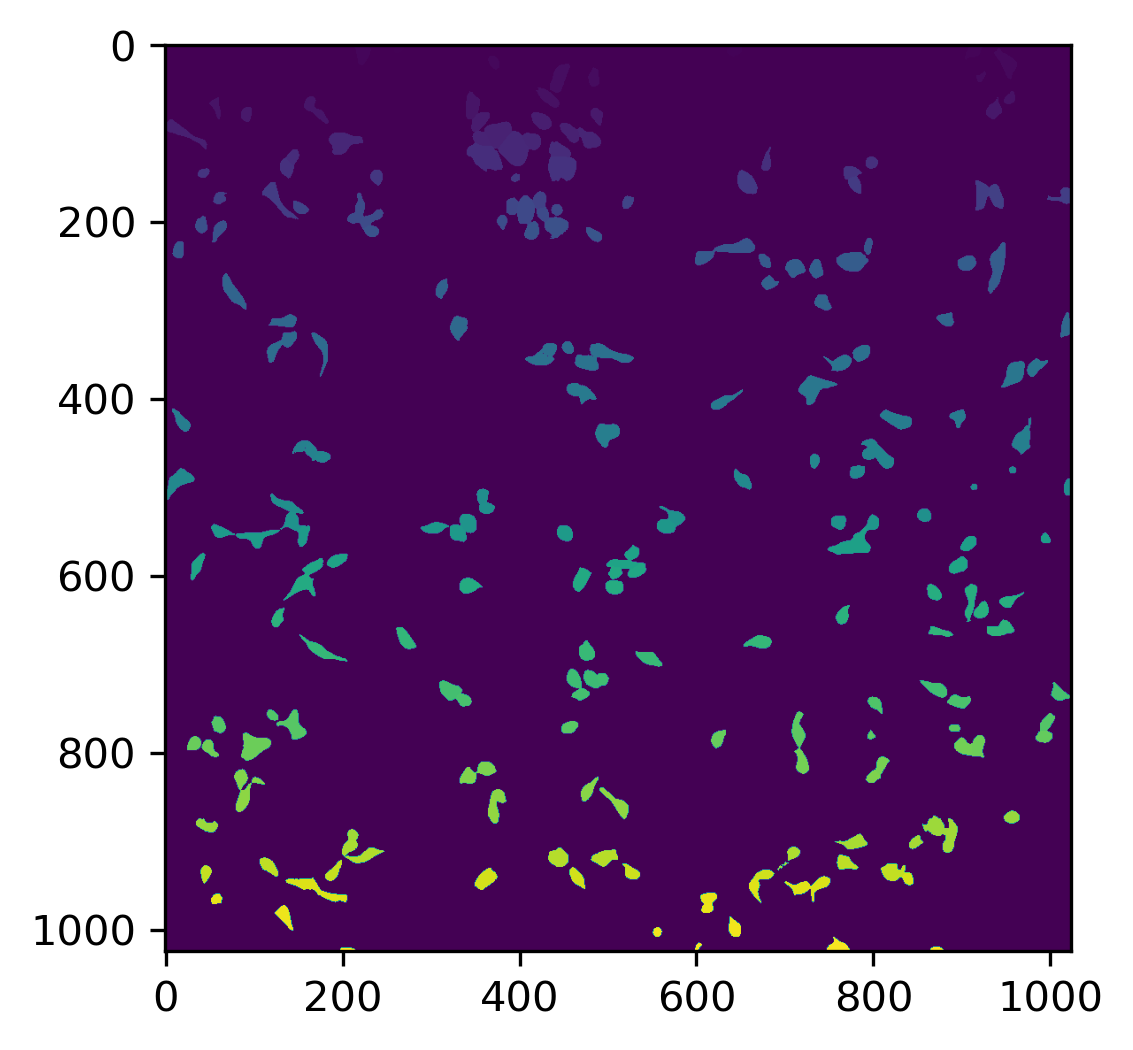

In [146]:

plt.imshow(masks[0])
plt.savefig('mask.png')

In [25]:
positions = pd.read_csv(CELL_POSITIONS)
positions

,x,y
0,369.757445,17.949288
1,954.536618,21.486268
2,392.156949,27.102031
3,475.909091,27.801930
4,445.544372,33.731241
...,...,...
219,202.995054,981.432471
220,46.113417,993.308666
221,28.549728,1001.870944
222,644.386081,1000.289189


In [26]:
annotation = pd.read_csv(BLOCK_ANNOTATION, header=None)
annotation

,0,1
0,ND8_DIV0+4h_20x_noConfinment_6_ch_4_30.tif,2
1,20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_32_...,4
2,20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_31_...,4
3,20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_28_...,4
4,20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_10_...,0
...,...,...
2277,20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_23_...,3
2278,ND8_DIV0+4h_20x_noConfinment_7_ch_4_97.tif,2
2279,ND8_DIV0+4h_20x_noConfinment_4_ch_4_186.tif,2
2280,20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_31_...,4


In [28]:
base_name = os.path.basename(tiff).split('.')[0].replace("_ch_4", "")

In [31]:
getPoint(positions,1)

(954, 21)

Processing 20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_26
not found: 64
duplicate: 2
{5: 2, 6: 4, 9: 0, 8: 1, 14: 0, 15: 4, 16: 4, 17: 2, 24: 4, 26: 1, 29: 3, 31: 3, 32: 0, 33: 3, 36: 1, 35: 1, 37: 4, 39: 1, 41: 4, 42: 2, 44: 2, 47: 1, 48: 4, 50: 4, 52: 3, 54: 3, 56: 1, 58: 0, 59: 1, 64: 2, 60: 4, 61: 3, 63: 3, 67: 1, 65: 2, 68: 2, 66: 2, 69: 4, 70: 2, 71: 2, 72: 3, 73: 1, 74: 2, 75: 4, 77: 3, 79: 1, 76: 1, 80: 1, 81: 2, 82: 2, 86: 2, 83: 3, 84: 0, 88: 3, 85: 2, 87: 3, 89: 2, 91: 3, 90: 0, 92: 4, 93: 1, 95: 1, 98: 1, 97: 1, 99: 1, 100: 1, 101: 4, 104: 0, 105: 3, 108: 4, 109: 4, 110: 0, 113: 3, 114: 4, 118: 1, 116: 4, 122: 4, 120: 3, 119: 3, 121: 4, 123: 1, 125: 4, 126: 3, 124: 4, 127: 1, 130: 3, 131: 1, 134: 4, 133: 1, 135: 2, 140: 4, 136: 0, 137: 1, 141: 1, 143: 1, 142: 0, 145: 2, 144: 4, 146: 4, 147: 2, 148: 1, 149: 4, 153: 2, 154: 4, 155: 0, 156: 3, 157: 1, 162: 1, 161: 3, 164: 1, 165: 2, 167: 0, 166: 4, 168: 4, 176: 2, 172: 1, 174: 2, 177: 1, 181: 3, 180: 3, 178: 1, 182: 2, 184: 4, 

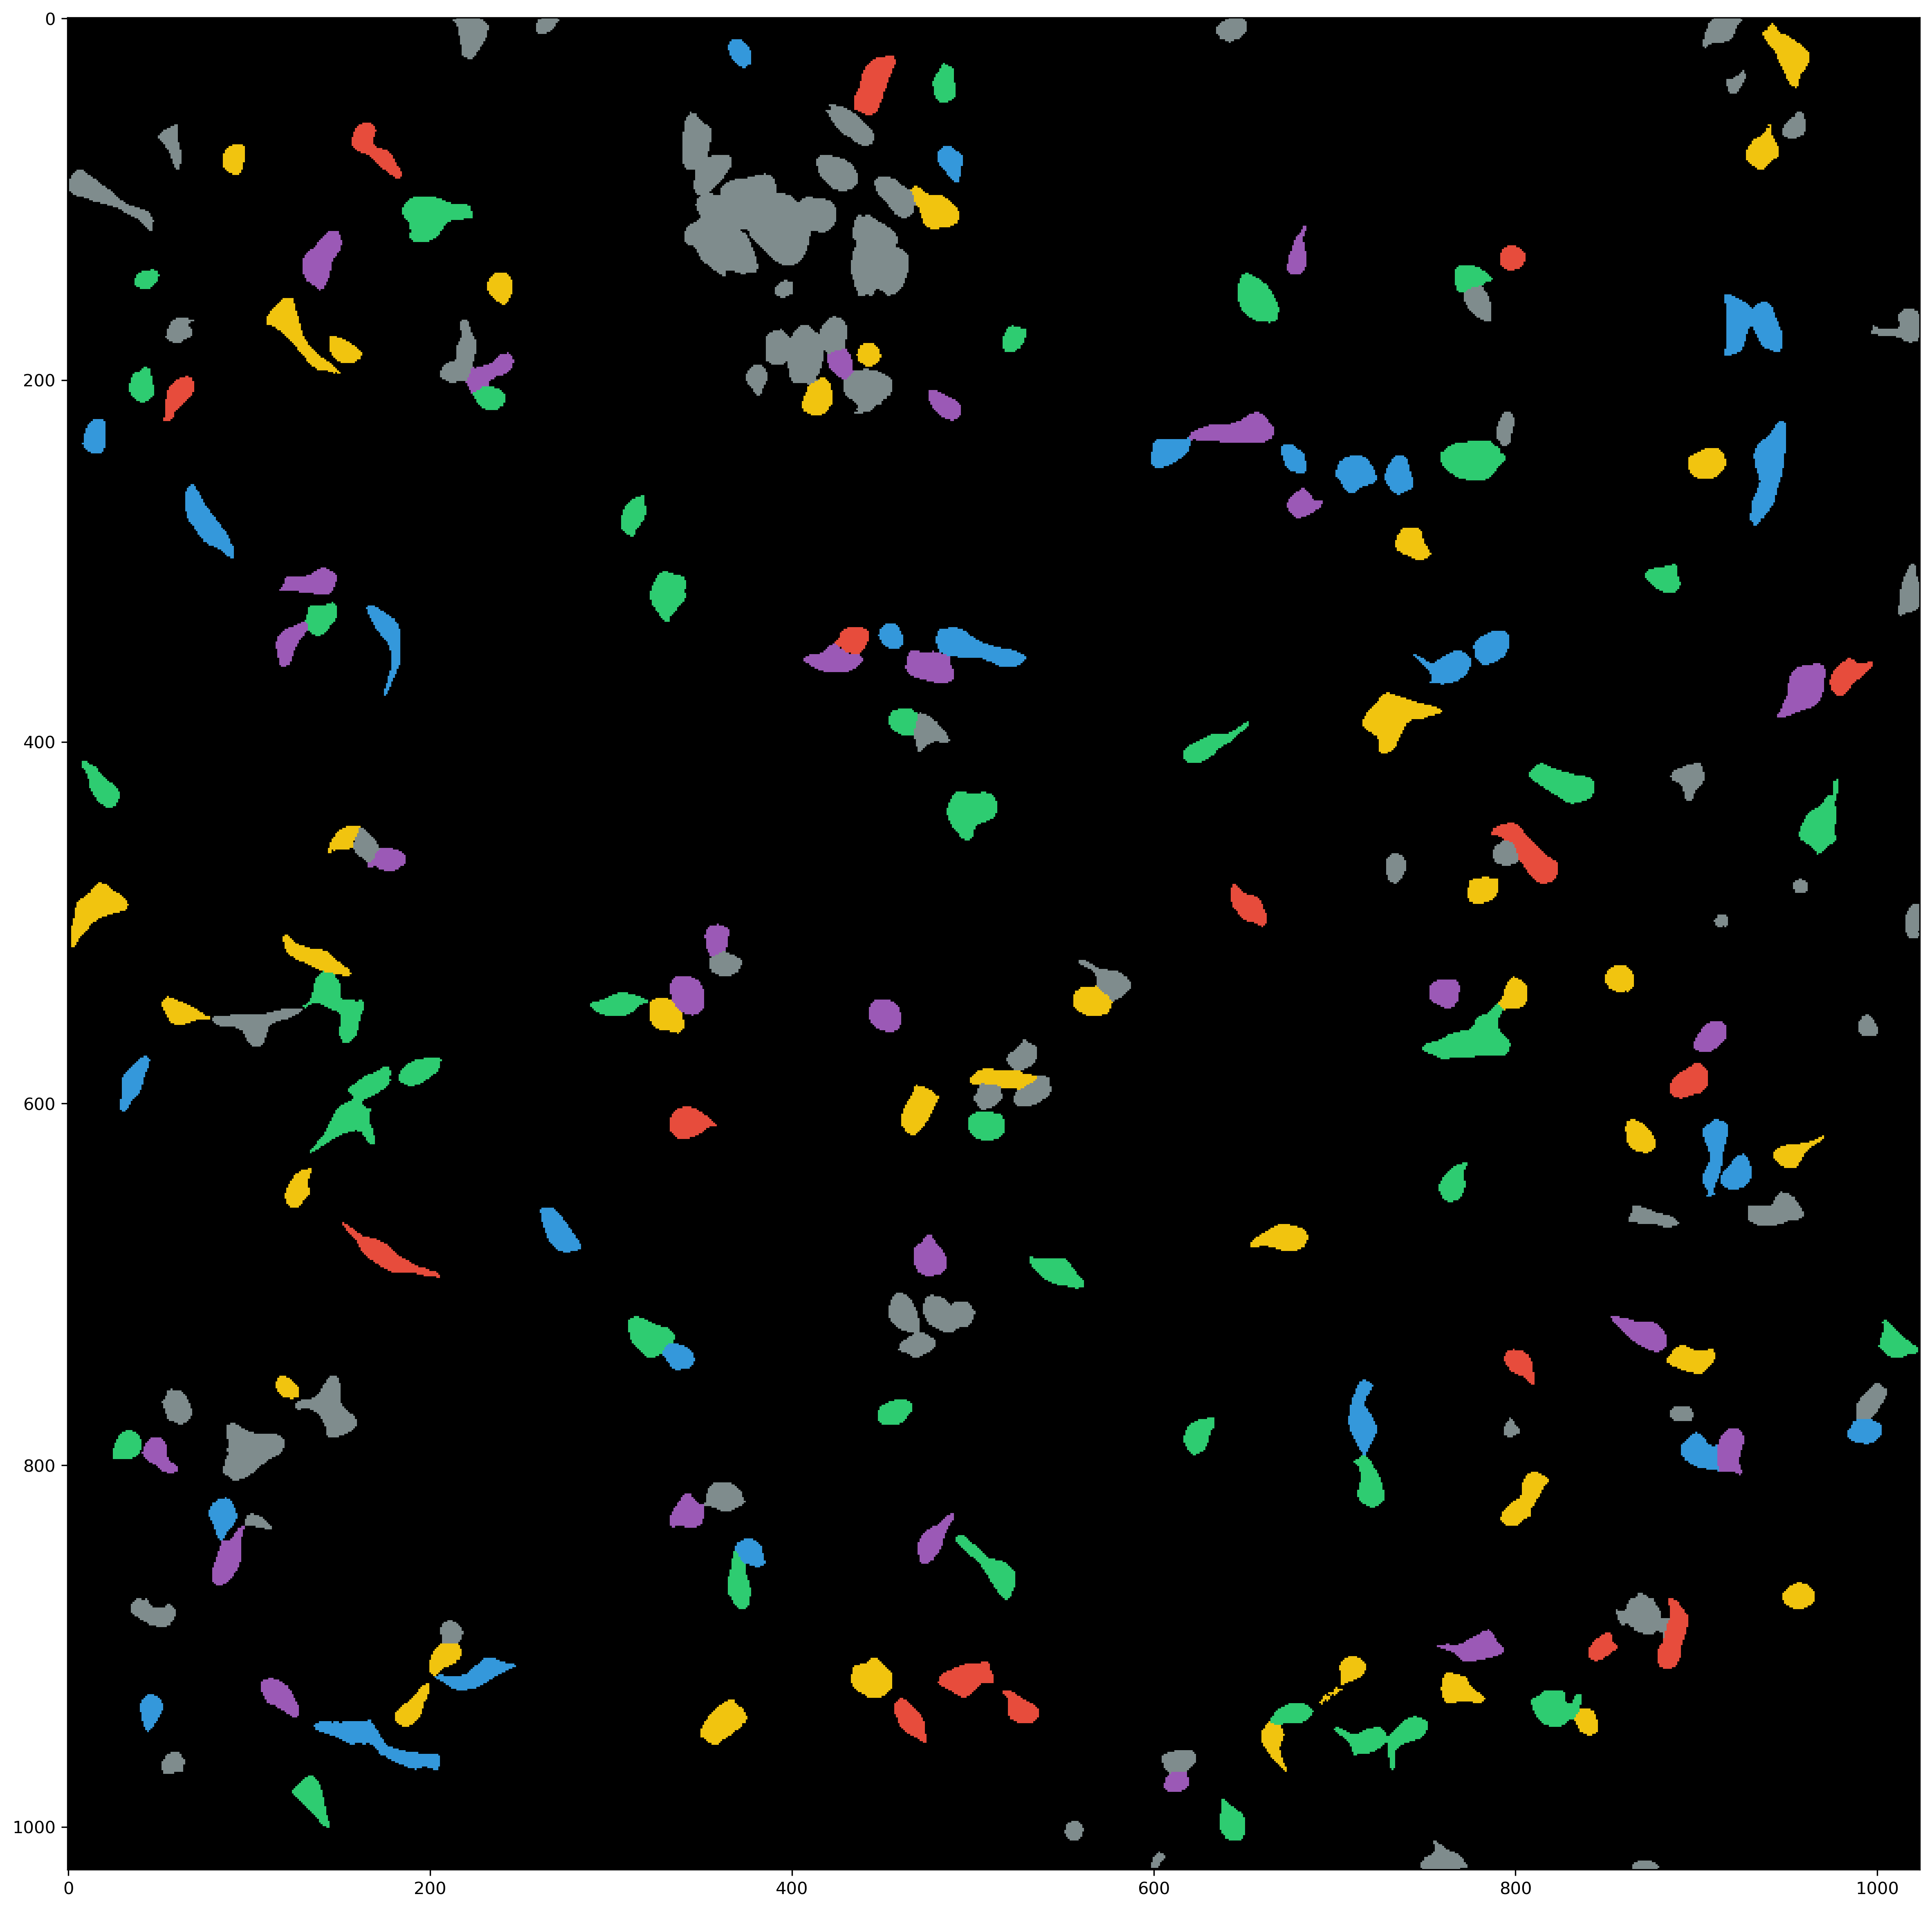

In [144]:
def getAnnotationMap(positions,mask,annotations):
    vals = {}
    not_found = 0
    duplicate = 0
    for i in range(positions.shape[0]):
        x,y = getPoint(positions,i)
        annotation_value = annotations[1][i]
        mask_reference = mask[y][x]
        if mask_reference == 0 :
            not_found = not_found +1
        elif mask_reference in vals.keys():
                duplicate = duplicate +1
        elif mask_reference > 0 :
            vals.update({mask_reference: annotation_value})
    print("not found: %d"%not_found)
    print("duplicate: %d"%duplicate)
    return vals,not_found,duplicate

def processImage(csv,basename,mask,annotations):
    print('Processing %s'%basename)
#     mask = skimage.io.imread(maskPath)
    result = np.zeros((1024,1024,3), np.uint8)
    positions = pd.read_csv(csv)
    size = positions.shape[0]
    vals,_,_ = getAnnotationMap(positions,mask,annotations)   
    nb_instances = mask.max()
    print(vals)
    color = getColor(5)
    plt.imshow(result)
    for i in range(1,nb_instances):
        result[mask == i] = color
    for k in vals:
        if k == 1:
            continue
        color = getColor(vals[k])
        result[mask == k] = color
    return result
#         print("%d - %d"%(k,vals[k]))

        
#         x,y = getPoint(positions,i)
#         val = vals[i]
        
#         print("%d-%d - %s"%(x,y,val))
#         return result
#         annotation = getAnnotation(annotations,block_name)
#         if annotation == -1 :
#             continue
#         if val > 0 :
#             activated_mask = activate(mask,val)
#             activated_mask = np.stack((activated_mask,)*3, axis=-1)
#             masked_image = activateImage(image, activated_mask)
#             height, width = image.shape
#             if(checkPosition(height, width,y,x,BLOCK_SIZE)==False):
#                 continue
#             cropped_image = cropImage(masked_image,x,y,BLOCK_SIZE)
#             Xt.append(cropped_image)
#             yt.append(annotation)
#     print('%s created %d images'%(os.path.basename(tiff),len(Xt)))
#     return result

# MASK_IMG = '../data/masks/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_26_ch_4.jpg'
BLOCK_ANNOTATION = '../data/raw/block_annotation2.csv'
CELL_POSITIONS = '../data/raw/CSV_patryk/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_26_ch_4.csv'
base_name = os.path.basename(MASK_IMG).split('.')[0].replace("_ch_4", "")
# mask = plt.imread(MASK_IMG)
annotation = pd.read_csv(BLOCK_ANNOTATION, header=None)
result = processImage(CELL_POSITIONS,base_name,masks[0],annotation)
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.imshow(result)
plt.savefig('have.png')

In [118]:
mask = masks[0]

In [138]:
img = np.asarray(img, dtype = np.int32)
mask = np.asarray(mask, dtype = np.int32)
result = np.asarray(result, dtype = np.int32)
img.shape

(1024, 1024, 3)

In [139]:
# mask = np.stack((mask,mask,mask), axis=2)

In [142]:
alpha = 0.4
beta = (1.0 - alpha)
dst = cv2.addWeighted(img, alpha, result, beta, 0.0)

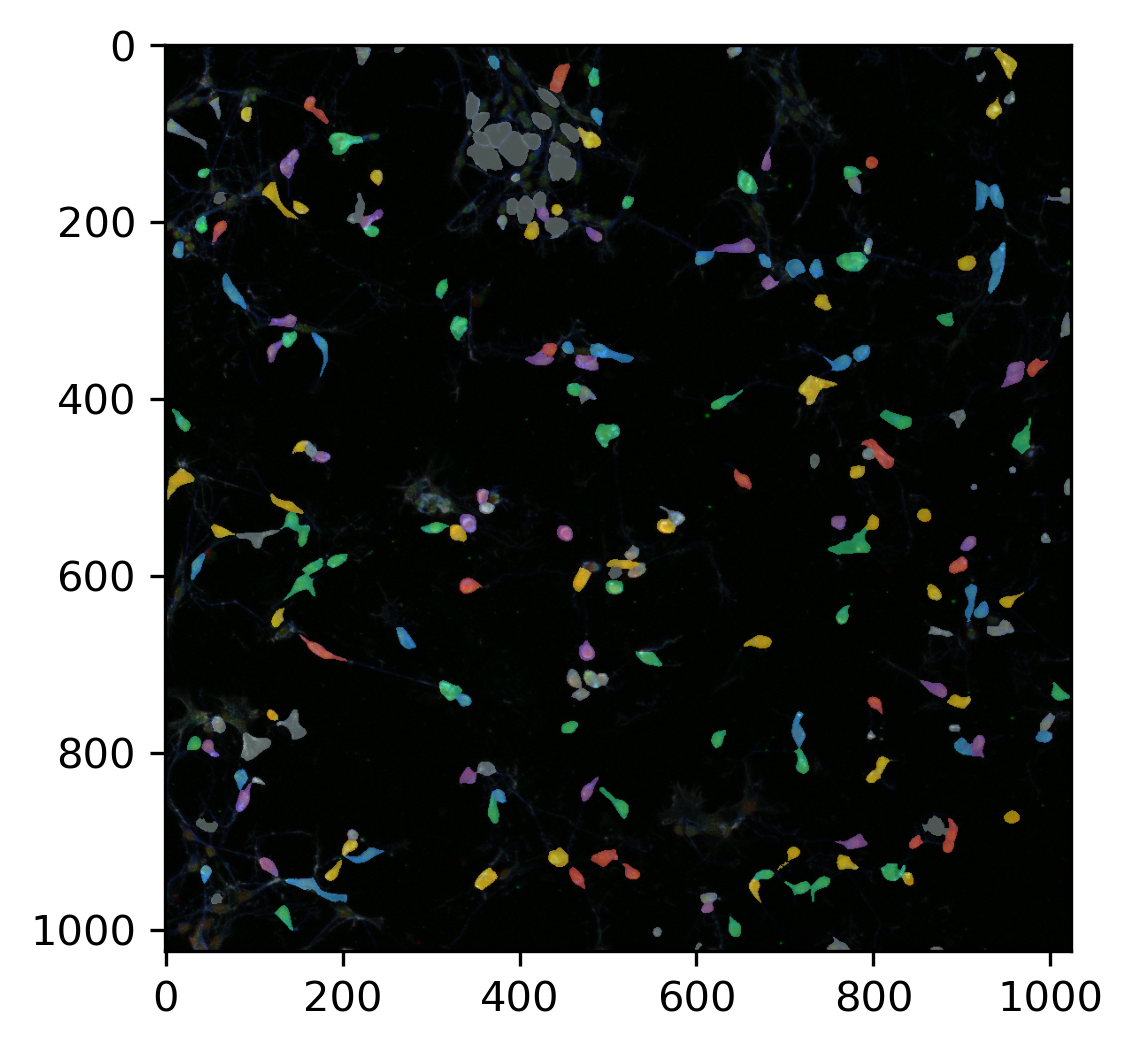

In [145]:
plt.imshow(dst)
plt.savefig('mix.png')

In [ ]:
img_rgb[mask == 255] = [0, 0, 255]

In [ ]:
# activated_mask = activate(masks[0],110)
# print(activated_mask.max())
# activated_mask = np.stack((activated_mask,)*3, axis=-1)
# print(activated_mask.shape)
# show(activated_mask,'Mask')

In [ ]:
# import cv2
# image = imgs[0]
# dst = activateImage(image, stacked_img)
# show(dst,'Mask')

In [ ]:
# number_segments = masks[0].max()
# # number_segments
# for i in range(1,20):
#     x = activate(masks[0],i)
#     stacked_img = np.stack((x,)*3, axis=-1)
#     dst = activateImage(image, stacked_img)
#     show(dst,str(i))

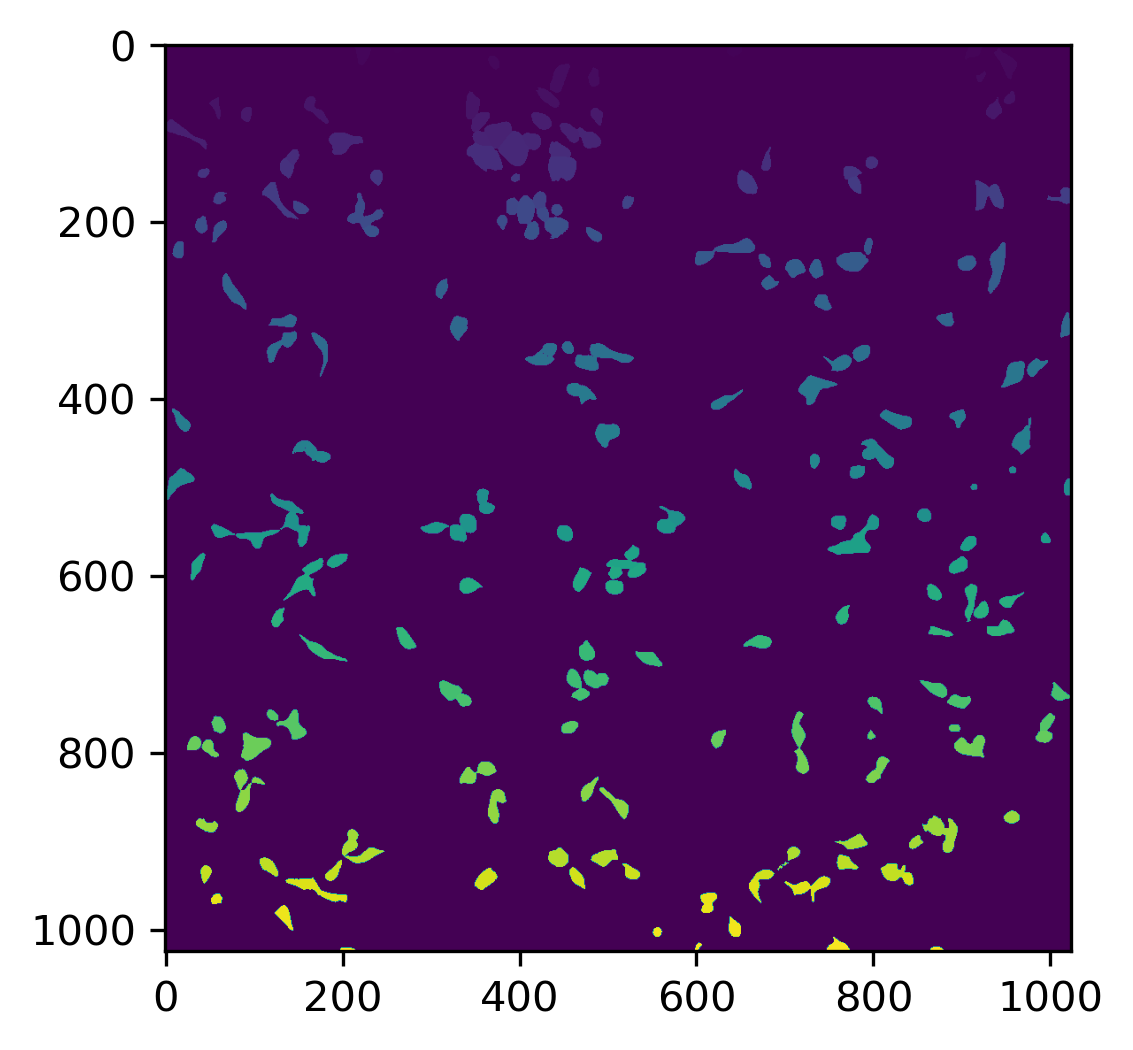

In [150]:
plt.imshow(masks[1])